In [13]:
import pandas as pd
from scipy import stats
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_style("whitegrid")

In [50]:
df_test = pd.read_csv('../thesis/figures/all/run-20200412-172004no_decay_test-tag-loss.csv')
df_train = pd.read_csv('../thesis/figures/all/run-20200412-172004no_decay_train-tag-loss.csv')

In [51]:
28483560/8000

3560.445

In [52]:
df_test

Wall time      Step     Value
0  1.586705e+09      3560  0.000069
1  1.586713e+09   1783560  0.000042
2  1.586722e+09   3563560  0.000017
3  1.586730e+09   5343560  0.000042
4  1.586739e+09   7123560  0.000066
5  1.586747e+09   8903560  0.000021
6  1.586755e+09  10683560  0.000080
7  1.586764e+09  12463560  0.000008
8  1.586772e+09  14243560  0.000092

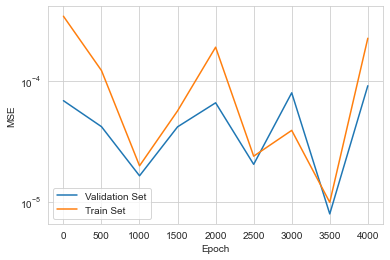

In [53]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(df_test.Step/3560.445, df_test.Value)
ax.plot(df_train.Step/3560.445, df_train.Value)

ax.set_yscale('log')
plt.legend(['Validation Set','Train Set'])
plt.xlabel('Epoch')
plt.ylabel('MSE')

plt.savefig('no_decay')

In [15]:
df_ann = pd.read_csv('../results2/2020-05-31--02-24-11_ANN_gpuAMZN', names=['mse'])
df_de = pd.read_csv('../results2/2020-05-31--02-24-41_diffevAMZN', names=['mse'])
df_trf = pd.read_csv('../results2/2020-05-31--02-22-55_trfAMZN', names=['mse'])

In [5]:
l = [df_ann, df_de, df_trf]

In [20]:
[np.mean(x) for x in l]

[mse    9.355654
 dtype: float64,
 mse    5.944991
 dtype: float64,
 mse    5.933696
 dtype: float64]

In [22]:
5.94/9.35

0.6352941176470589

In [9]:
stats.kruskal(df_trf.mse, df_ann.mse, df_de.mse)

KruskalResult(statistic=15.847917685169865, pvalue=0.00036196651783490703)

In [25]:
stats.ttest_ind(df_ann.mse, df_de.mse, equal_var=False)

Ttest_indResult(statistic=1.9051584618926802, pvalue=0.06632953103100013)

In [29]:
[np.mean(x.mse) for x in l]

[23.442794931825325, 16.743376487713743, 28.46743032512453]

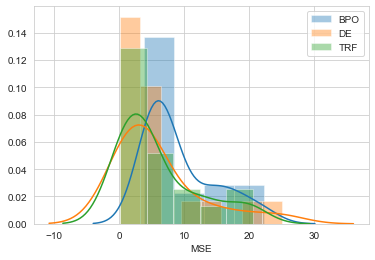

In [19]:
sns.set_style("whitegrid")
sns.distplot(df_ann.mse)
sns.distplot(df_de.mse)
sns.distplot(df_trf.mse)
plt.xlabel('MSE')
plt.legend(['BPO','DE','TRF'])
# plt.savefig('../thesis/figures/statistics/distributions')

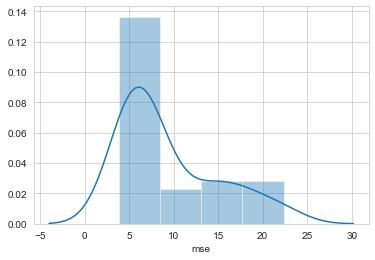

In [11]:
sns.set_style("whitegrid")
# sns.distplot(df_ann.mse)
# 

In [48]:
df = pd.read_csv('../data/second_batch/train_x.csv')

In [49]:
df =df[df.underlying == 'AMZN']

In [52]:
# df.to_csv('train.csv')